# napari quick start

## About napari

napari is a fast, interactive, multi-dimensional image viewer, with [a vibrant plugin ecosystem](https://www.napari-hub.org/) that expands its capability to tackle various domain-specific visualization and analysis needs. It is built on Qt (for the GUI), vispy (for performant GPU-based rendering), and the scientific Python stack (numpy, scipy, and scikit-image). 

napari is an open source project on [GitHub](https://github.com/napari/napari) to facilitate transparency, reuse, and extensibility. 

At its core, it provides critical viewer features out-of-the-box, such as support for [large multi-dimensional data](https://napari.org/tutorials/applications/dask.html); provide [“layers”](https://napari.org/tutorials/start_index.html) to simultaneously visualize images, models, and analysis results; and easy manual, interactive annotation in 3D.

This tutorial uses napari 0.4.13. <br>

## What's covered here

This tutorial is for napari first-timers to give them a quick glance of what napari does, and give it a try right away. We will cover:

- Installation 
- Open napari
- Open an image
- Image display adjustment
- Manually label the cell
- Get the cell area measurement
- Next steps

Along the way, you will see how to access napari functions from [Python code](https://napari.org/api/stable/index.html) and from GUI - though for different purposes, one method might be easier than another. This quick start guide will not cover ALL possible methods but only some ways to perform basic tasks. For the more complete guide, please visit [napari.org](https://napari.org/).

You will also see some examples of plugins. The core napari viewer focuses on domain-agnostic functions such as layer controls. Analyses and domain specific functions, such as reading a special file format and image segmentation, live in the realm of [plugins](https://www.napari-hub.org/).    

### Installation

- For those familiar with Python:

    napari can be installed on most macOS, Linux, and Windows systems with Python 3.7, 3.8, and 3.9 using pip:

```python
pip install 'napari[all]'
```

- Or download the bundled app for simple installation:

    [Linux installation](napari-0.4.13-Linux-x86_64.zip)<br>
    [macOS installaion](napari-0.4.13-macOS-x86_64.zip)<br>
    [Windows installation](napari-0.4.13-Windows-x86_64.zip)<br>

    *Note: 0.4.13 bundled app is missing sample menu data ([issue 3968](https://github.com/napari/napari/issues/3968))*
    
    *Note: for the latest release, please visit [here](https://github.com/napari/napari/releases) and look for Assets.*

If you run into any issue, please visit the more detailed [installation guide](https://napari.org/tutorials/fundamentals/installation.html), or report an issue on GitHub!

### Open napari

napari can be opened by [multiple ways](https://napari.org/tutorials/fundamentals/getting_started.html), depending on how its used in your image analysis workflow. 

Here we will be mainly focused on the GUI application.

- From command line: 

    Once installed, simply run    
```python
napari
```

- If you installed the bundled app:

    Click on the app icon to open it.<br>
    *Note: for mac users, it may require [security setting changes](https://napari.org/tutorials/fundamentals/installation.html).*

### Open an image

napari natively supports tiff and many other formats supported by [skimage.io.imread](https://scikit-image.org/docs/dev/api/skimage.io.html) as input image file format.<br>
Try with your own images or download [this ome tiff file](https://downloads.openmicroscopy.org/images/OME-TIFF/2016-06/MitoCheck/00001_01.ome.tiff).

Additional input file formats may be supported [by plugins](https://www.napari-hub.org/). 
Try [napari-aicsimageio](https://www.napari-hub.org/plugins/napari-aicsimageio) if you have czi, lif, or nd2 files.

Once you have the proper plugin installed, use File > Open Files(s)... and select the image file, or simply drag and drop the image into napari. 

For demo purpose, we will use a sample image that comes with napari.

(1) Open napari IPython console
<img src="img/IPython.png" alt="IPython console" width="30%"/>

(2) Type
    
```python
from skimage import data
viewer.add_image(data.cell(), name='cell')
```

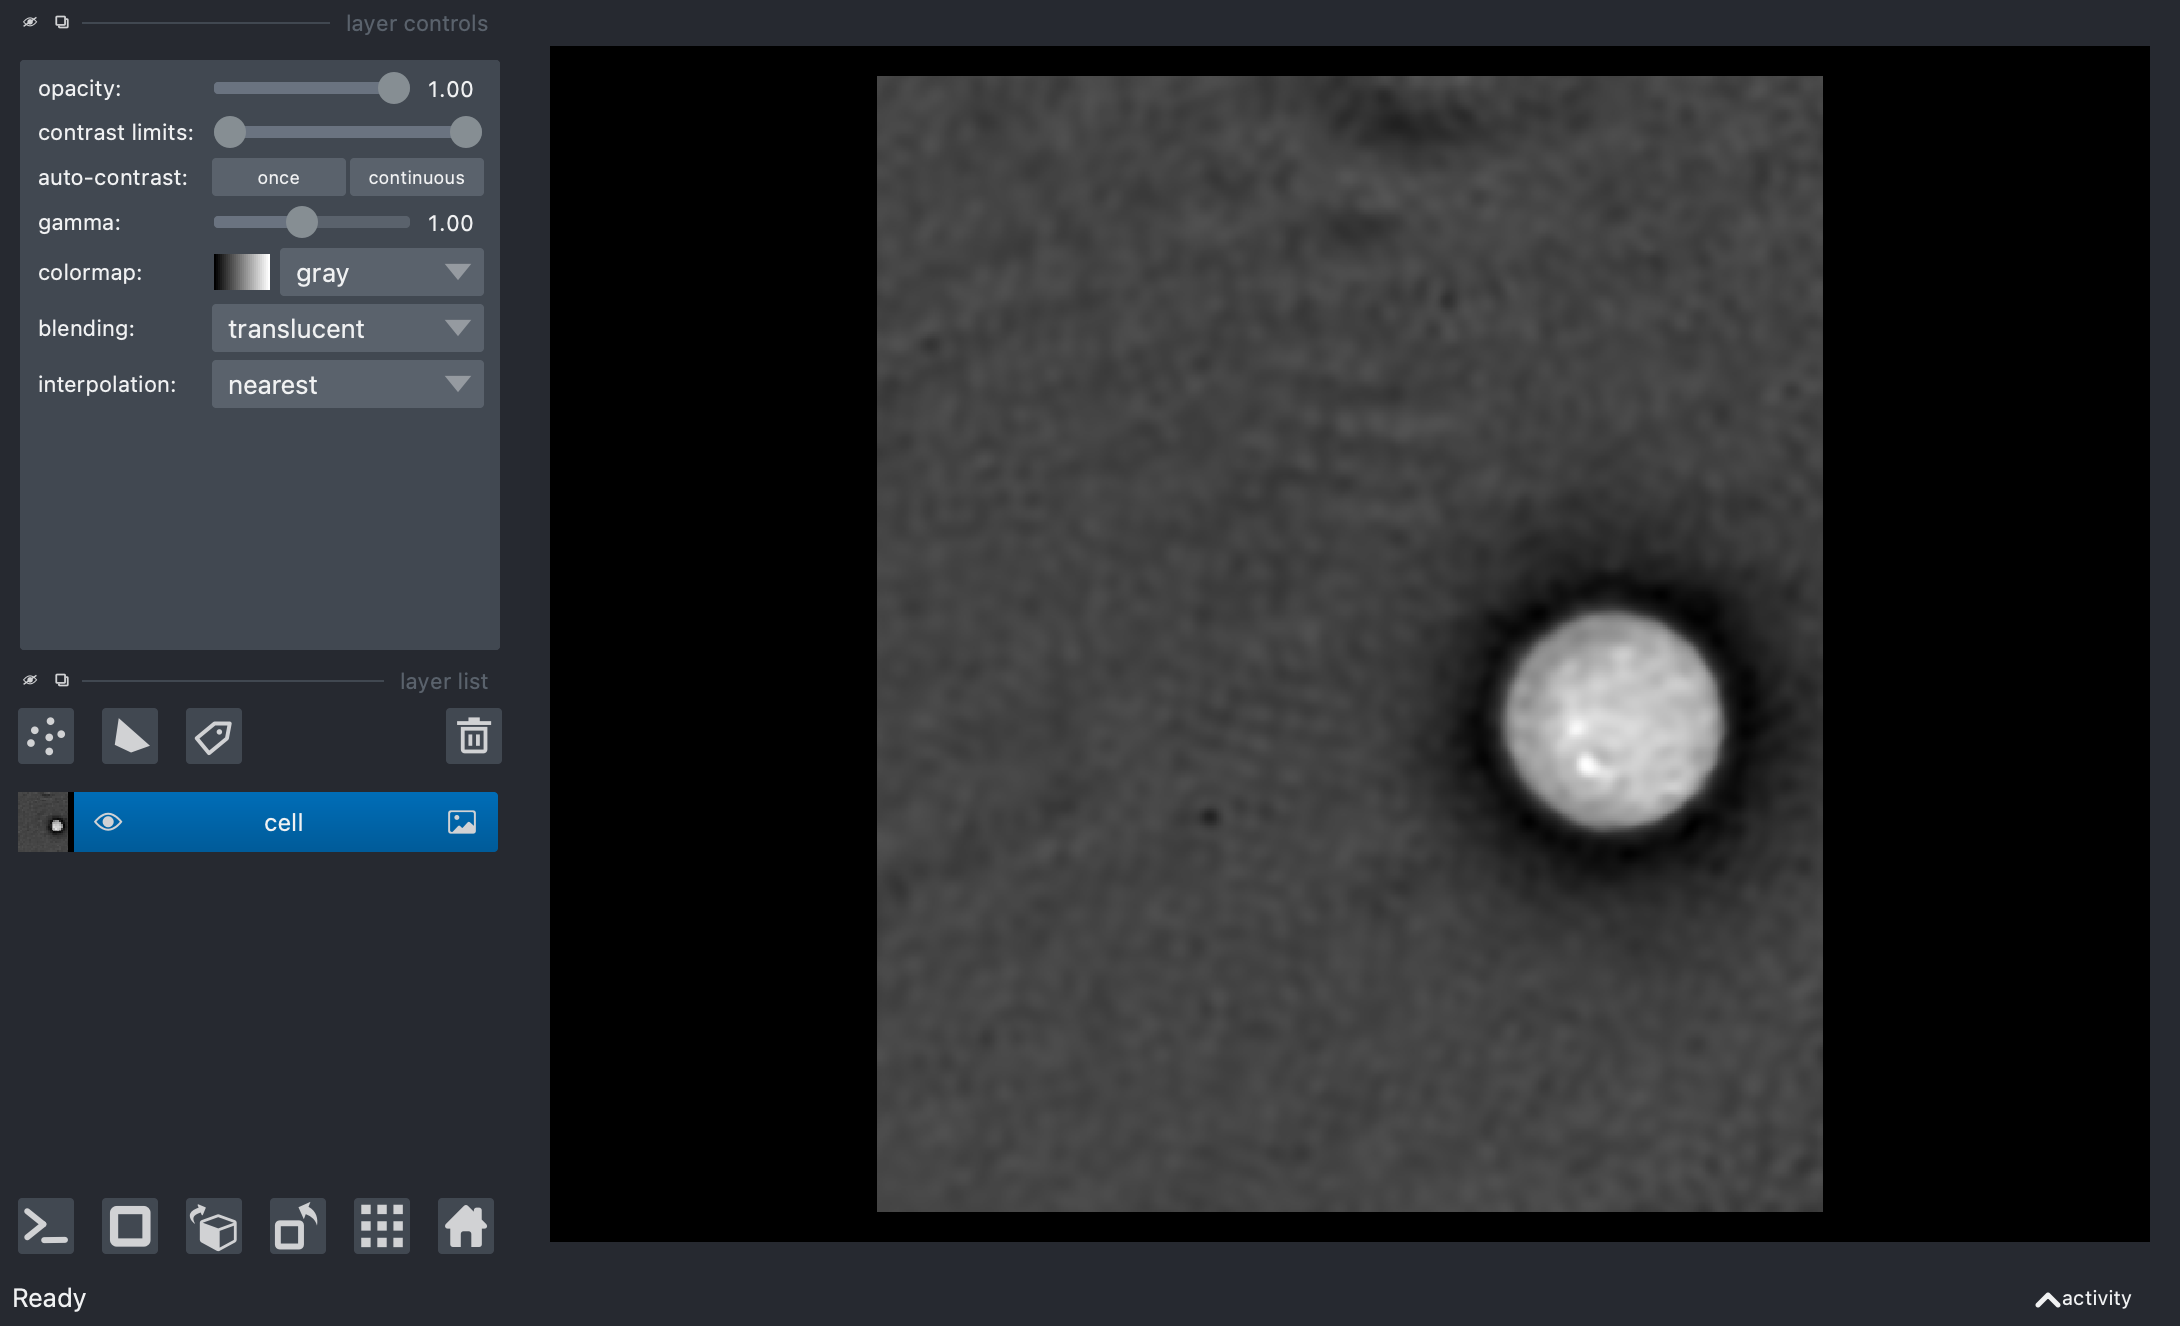

In [5]:
import napari
from napari.utils import nbscreenshot

viewer = napari.Viewer()

from skimage import data
viewer.add_image(data.cell(), name='cell')
nbscreenshot(viewer)

### Image display adjustment

The layer control panel at the upper left of napari viewer allows you adjust contrast, colormap etc. These settings affect the visualization, but do not affect the underlying data.

To change the image display through [API](https://napari.org/api/stable/napari.layers.Image.html), in IPython console, type

```python
viewer.layers['cell'].colormap = "yellow"
```

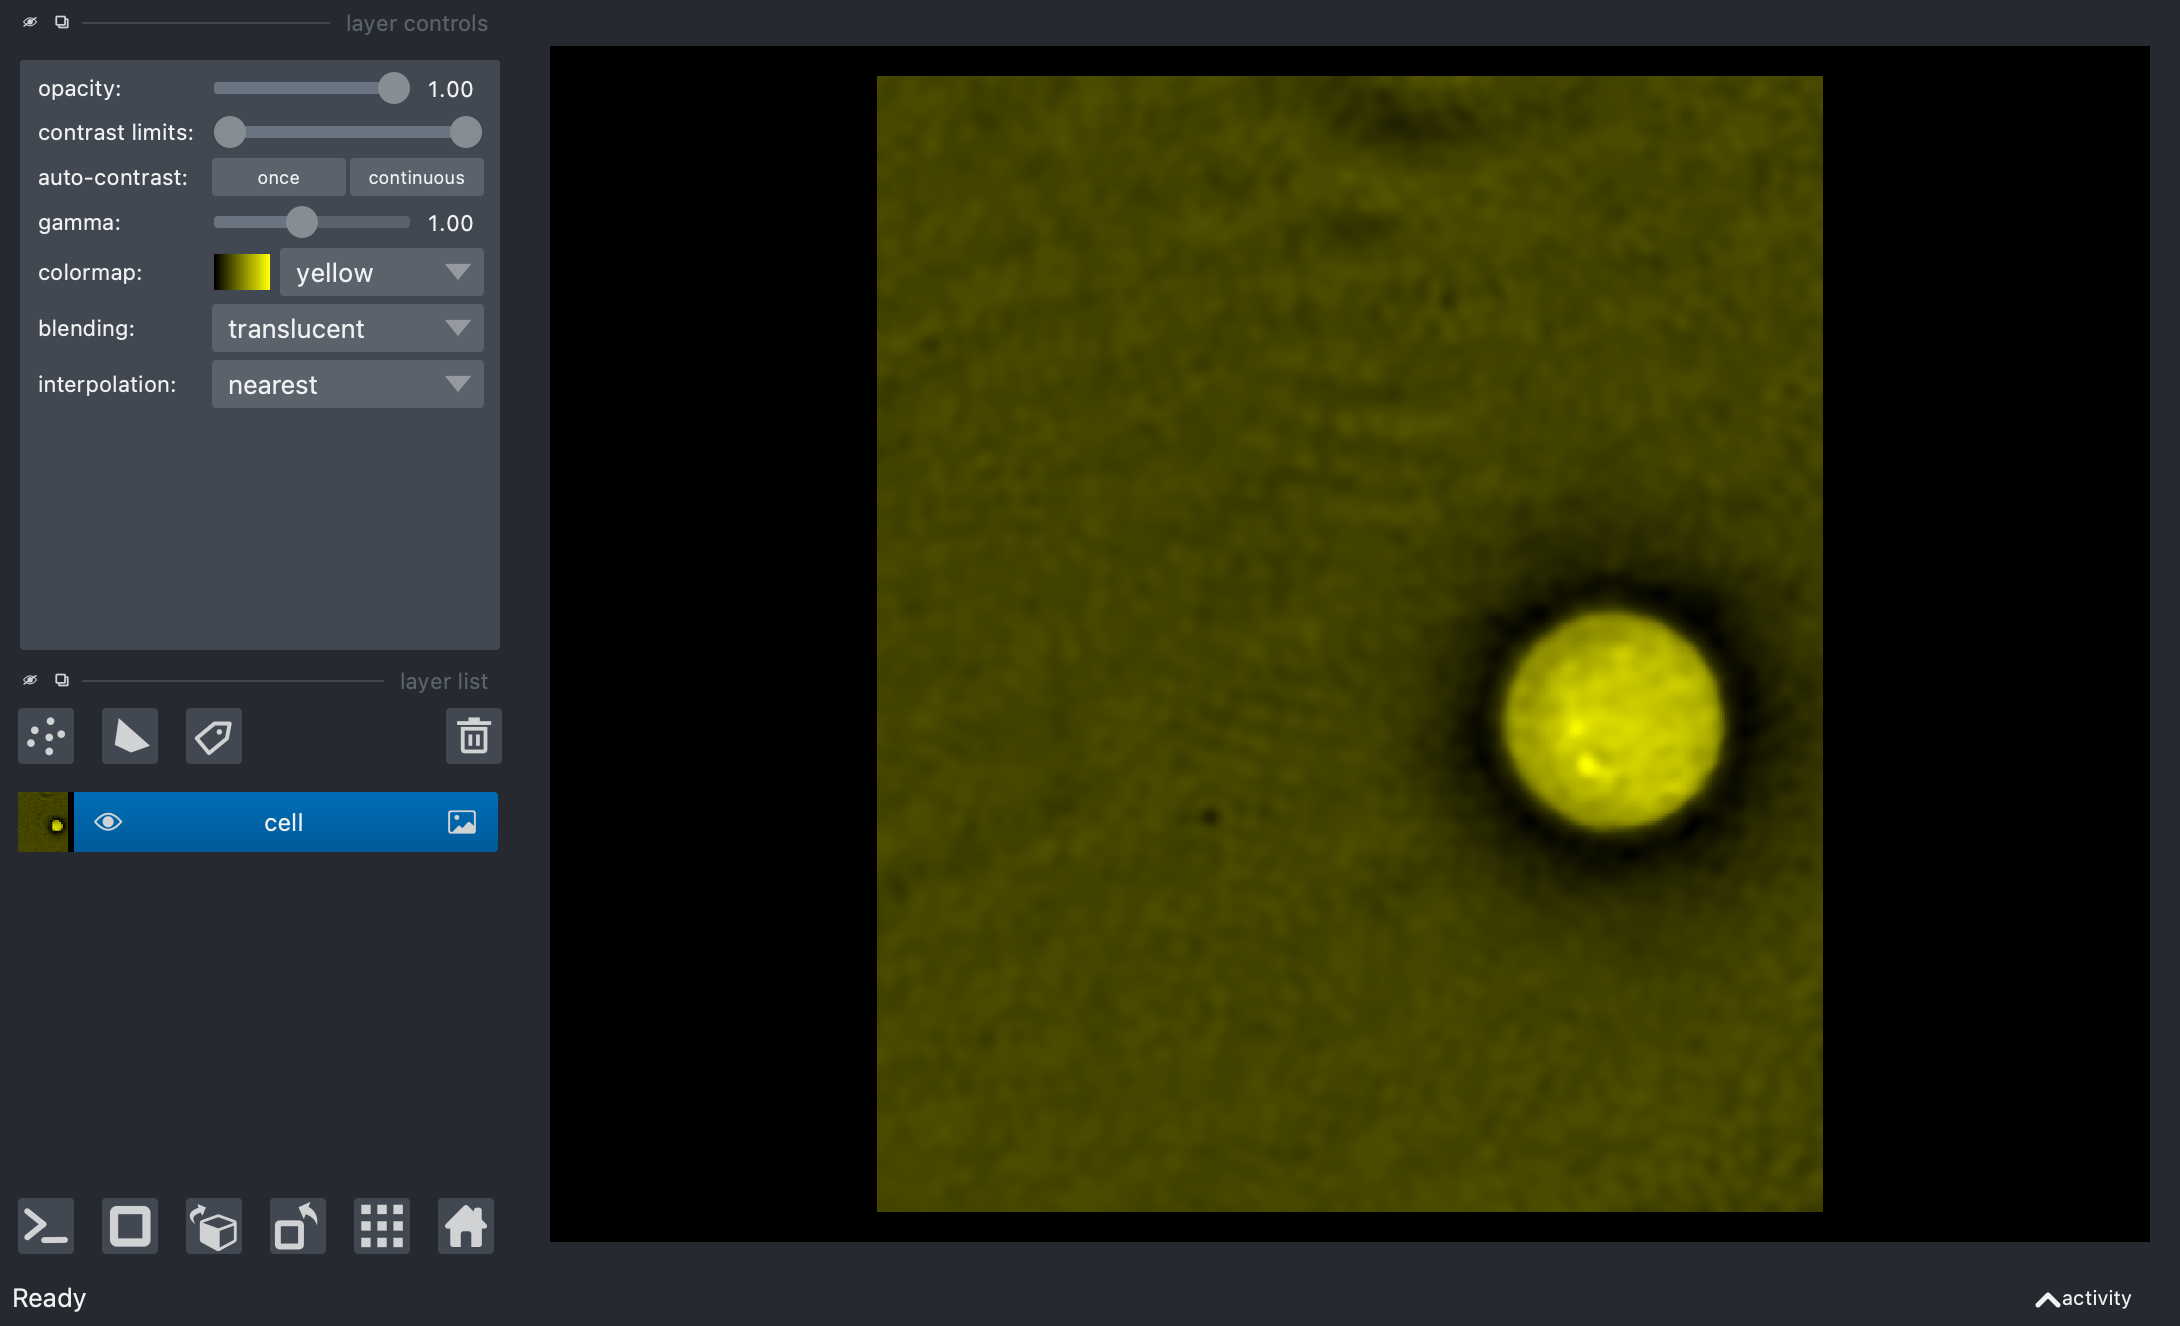

In [6]:
viewer.layers['cell'].colormap = "yellow"
nbscreenshot(viewer)

### Manually label the cell

To measure the area of the cell, we can use labels layer and manually "paint" the cell.
The labels layer allows you to record the segmentation result by assigning background = 0, and assigning each object with an integer.

(1) Add a new labels layer <br> 
(2) Click on "paint" <br>
(3) Circle the cell <br>
(4) Use "fill" bucket to fill it. <br>

![manual_label](./img/manual_label.gif)

Several plugins can perform automatic segmentation that takes image layer as input and generates labels layer as output. <br>
Try [cellpose-napari](https://www.napari-hub.org/plugins/cellpose-napari) if you have cell images.

### Get the cell area measurement

[skimage.measure.regionprops](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops) provides a good set of features that can be extracted from labels, including area measurement.

In IPython console, type

```python
from skimage.measure import regionprops
props = regionprops(viewer.layers['Labels'].data)
print("the cell area is: ", props[0].area)
```

Alternatively, try [this plugin](https://www.napari-hub.org/plugins/napari-skimage-regionprops) to have the result in a table form.

**Note:** the area reported by regionprops is the number of pixels. Check pixel size and convert the reported number to physical units.

In [7]:
viewer.close_all()

### Next steps
- Try opening 3D or higher dimensional images, and switch to 3D view. <br>
<img src="img/ndisplay.png" alt="ndisplay" width="30%"/> 
napari provides the flexibility to handle multi-dimensional data, though the increased dimension could add to overall complexity.

- Test some [examples](https://github.com/napari/napari/tree/main/examples) to see how to add different layer types and add your own widgets to napari. 

- Explore other [plugins](https://www.napari-hub.org/). A few fun ones: [napari-clusters-plotter](https://www.napari-hub.org/plugins/napari-clusters-plotter), [napari-pyclesperanto-assistant](https://www.napari-hub.org/plugins/napari-pyclesperanto-assistant), [napari-animation](https://www.napari-hub.org/plugins/napari-animation).

- If you don't see the functions you need in existing plugins, try to [make one](https://napari.org/plugins/stable/index.html)!

- Help napari project by [filing issues](https://github.com/napari/napari/issues) for bugs you encounter or features that you'd like to see! Or even better, come [join the community meeting](https://napari.org/community/meeting_schedule.html) and get to know the team.  